In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import numpy as np
import seaborn as sns
import warnings
from IPython import display
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from dython.nominal import associations
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('COVIDandFLUdata.csv')

In [3]:
df.head()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,...,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,38.111111,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,36.555556,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,...,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
1480,COVID19,NaN,1.40,NaN,NaN,NaN,NaN,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,COVID19,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,14.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1482,COVID19,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1483,COVID19,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1484,COVID19,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,5.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_covid19 = df.drop(range(0,1072))

In [6]:
dfa_covid19 = df.drop(range(0,1072))

In [7]:
(df.isna().sum()/len(df)) *100

Diagnosis                                   0.000000
InitialPCRDiagnosis                        92.996633
Age                                         1.885522
Sex                                         5.117845
Region                                     78.585859
CommunityTransmission                      83.232323
NumberOfFamilyMembersInfected              96.363636
neutrophil                                 93.063973
neutrophilCategorical                      90.033670
serumLevelsOfWhiteBloodCell                89.831650
serumLevelsOfWhiteBloodCellCategorical     87.138047
lymphocytes                                89.360269
lymphocytesCategorical                     86.868687
Plateletes                                 96.632997
CReactiveProteinLevels                     90.639731
CReactiveProteinLevelsCategorical          89.360269
Eosinophils                                99.461279
Red blood cells                            99.730640
Hemoglobin                                 98.

In [8]:
df_covid19.head()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,...,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
1072,COVID19,NaN,0.83,M,Beijing,No/Wuhan,NaN,NaN,normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,COVID19,NaN,36.00,M,Beijing,No,NaN,NaN,high,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,COVID19,NaN,49.00,F,Wuhan,No/Wuhan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,COVID19,NaN,61.00,M,Wuhan,No/Wuhan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,COVID19,NaN,32.00,M,Wuhan,No/Wuhan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_covid19

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,...,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
1072,COVID19,NaN,0.83,M,Beijing,No/Wuhan,NaN,NaN,normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,COVID19,NaN,36.00,M,Beijing,No,NaN,NaN,high,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,COVID19,NaN,49.00,F,Wuhan,No/Wuhan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,COVID19,NaN,61.00,M,Wuhan,No/Wuhan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,COVID19,NaN,32.00,M,Wuhan,No/Wuhan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,COVID19,NaN,1.40,NaN,NaN,NaN,NaN,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,COVID19,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,14.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1482,COVID19,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1483,COVID19,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# The Dataset Have 51 features and 413 Rows 

In [10]:
df_covid19.describe()

,Age,NumberOfFamilyMembersInfected,neutrophil,serumLevelsOfWhiteBloodCell,Plateletes,Eosinophils,Red blood cells,Hemoglobin,Procalcitonin,DurationOfIllness,...,NumberAffectedLobes,TimeBetweenAdmissionAndDiagnosis,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Monocytes,Basophil,Thrombocytes
count,389.000000,54.000000,103.000000,130.000000,50.000000,8.000000,4.000000,24.000000,33.000000,88.000000,...,24.000000,47.000000,67.000000,7.000000,9.000000,9.000000,19.000000,1.0,1.00,1.0
mean,38.913063,3.370370,6.854078,7.031223,220.320000,0.061250,4.225000,45.500000,2.586394,14.068182,...,1.750000,5.893617,37.620896,0.320286,33.188889,3.685556,3.123158,2.5,0.26,106.0
std,21.885982,2.658531,12.690131,4.267230,147.819034,0.074917,0.218251,51.074907,12.739322,9.022062,...,1.188715,4.161072,0.980343,0.084439,3.863756,0.797811,0.887556,NaN,NaN,NaN
min,0.000000,1.000000,0.446000,1.180000,65.000000,0.010000,3.990000,11.300000,0.020000,1.000000,...,0.000000,0.000000,36.200000,0.137000,27.000000,2.340000,0.500000,2.5,0.26,106.0
25%,26.000000,1.000000,2.160000,4.110000,130.000000,0.010000,4.095000,13.000000,0.030000,7.000000,...,1.000000,2.000000,36.700000,0.319500,30.500000,3.590000,2.780000,2.5,0.26,106.0
50%,39.000000,2.000000,3.310000,5.965000,185.500000,0.010000,4.205000,14.500000,0.070000,12.000000,...,2.000000,6.000000,37.500000,0.355000,33.400000,3.910000,3.000000,2.5,0.26,106.0
75%,57.000000,6.000000,6.645000,9.197500,250.750000,0.120000,4.335000,109.250000,0.120000,20.250000,...,2.000000,9.000000,38.500000,0.365500,34.600000,4.040000,3.845000,2.5,0.26,106.0
max,88.000000,8.000000,93.000000,36.070000,950.000000,0.200000,4.500000,137.000000,73.000000,37.000000,...,5.000000,15.000000,39.500000,0.380000,39.000000,4.750000,4.190000,2.5,0.26,106.0


In [11]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 1072 to 1484
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Diagnosis                               413 non-null    object 
 1   InitialPCRDiagnosis                     104 non-null    object 
 2   Age                                     389 non-null    float64
 3   Sex                                     392 non-null    object 
 4   Region                                  318 non-null    object 
 5   CommunityTransmission                   249 non-null    object 
 6   NumberOfFamilyMembersInfected           54 non-null     float64
 7   neutrophil                              103 non-null    float64
 8   neutrophilCategorical                   127 non-null    object 
 9   serumLevelsOfWhiteBloodCell             130 non-null    float64
 10  serumLevelsOfWhiteBloodCellCategorical  170 non-null    ob

In [12]:
(df_covid19.isna().sum()/len(df_covid19) )*100

Diagnosis                                   0.000000
InitialPCRDiagnosis                        74.818402
Age                                         5.811138
Sex                                         5.084746
Region                                     23.002421
CommunityTransmission                      39.709443
NumberOfFamilyMembersInfected              86.924939
neutrophil                                 75.060533
neutrophilCategorical                      69.249395
serumLevelsOfWhiteBloodCell                68.523002
serumLevelsOfWhiteBloodCellCategorical     58.837772
lymphocytes                                66.828087
lymphocytesCategorical                     57.869249
Plateletes                                 87.893462
CReactiveProteinLevels                     66.343826
CReactiveProteinLevelsCategorical          61.743341
Eosinophils                                98.062954
Red blood cells                            99.031477
Hemoglobin                                 94.

<AxesSubplot:xlabel='SmokingStatus', ylabel='count'>

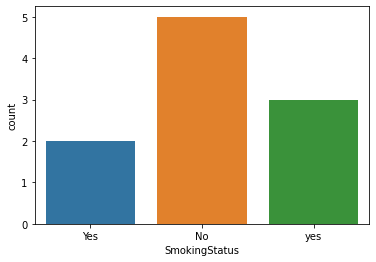

In [13]:
sns.countplot(df_covid19['SmokingStatus'])

<AxesSubplot:xlabel='Cancer', ylabel='count'>

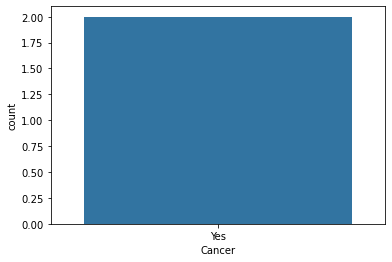

In [14]:
sns.countplot(df_covid19['Cancer'])

<AxesSubplot:xlabel='DaysToDeath', ylabel='count'>

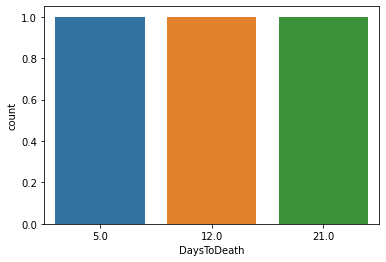

In [15]:
sns.countplot(df_covid19['DaysToDeath'])

In [16]:
df_covid19.describe()

,Age,NumberOfFamilyMembersInfected,neutrophil,serumLevelsOfWhiteBloodCell,Plateletes,Eosinophils,Red blood cells,Hemoglobin,Procalcitonin,DurationOfIllness,...,NumberAffectedLobes,TimeBetweenAdmissionAndDiagnosis,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Monocytes,Basophil,Thrombocytes
count,389.000000,54.000000,103.000000,130.000000,50.000000,8.000000,4.000000,24.000000,33.000000,88.000000,...,24.000000,47.000000,67.000000,7.000000,9.000000,9.000000,19.000000,1.0,1.00,1.0
mean,38.913063,3.370370,6.854078,7.031223,220.320000,0.061250,4.225000,45.500000,2.586394,14.068182,...,1.750000,5.893617,37.620896,0.320286,33.188889,3.685556,3.123158,2.5,0.26,106.0
std,21.885982,2.658531,12.690131,4.267230,147.819034,0.074917,0.218251,51.074907,12.739322,9.022062,...,1.188715,4.161072,0.980343,0.084439,3.863756,0.797811,0.887556,NaN,NaN,NaN
min,0.000000,1.000000,0.446000,1.180000,65.000000,0.010000,3.990000,11.300000,0.020000,1.000000,...,0.000000,0.000000,36.200000,0.137000,27.000000,2.340000,0.500000,2.5,0.26,106.0
25%,26.000000,1.000000,2.160000,4.110000,130.000000,0.010000,4.095000,13.000000,0.030000,7.000000,...,1.000000,2.000000,36.700000,0.319500,30.500000,3.590000,2.780000,2.5,0.26,106.0
50%,39.000000,2.000000,3.310000,5.965000,185.500000,0.010000,4.205000,14.500000,0.070000,12.000000,...,2.000000,6.000000,37.500000,0.355000,33.400000,3.910000,3.000000,2.5,0.26,106.0
75%,57.000000,6.000000,6.645000,9.197500,250.750000,0.120000,4.335000,109.250000,0.120000,20.250000,...,2.000000,9.000000,38.500000,0.365500,34.600000,4.040000,3.845000,2.5,0.26,106.0
max,88.000000,8.000000,93.000000,36.070000,950.000000,0.200000,4.500000,137.000000,73.000000,37.000000,...,5.000000,15.000000,39.500000,0.380000,39.000000,4.750000,4.190000,2.5,0.26,106.0


[Text(0, 0, 'Beijing'),
 Text(1, 0, 'Wuhan'),
 Text(2, 0, 'Cruise ship'),
 Text(3, 0, 'Zhengzhou '),
 Text(4, 0, 'Zhengzhou'),
 Text(5, 0, 'Huazhong'),
 Text(6, 0, 'Chongqing'),
 Text(7, 0, 'Kunming'),
 Text(8, 0, 'Korea'),
 Text(9, 0, 'Singapore'),
 Text(10, 0, 'Shanghai'),
 Text(11, 0, 'Jiangxi'),
 Text(12, 0, 'Vietnam'),
 Text(13, 0, 'Taiwan'),
 Text(14, 0, 'Qingdao'),
 Text(15, 0, 'Hainan'),
 Text(16, 0, 'Guangdong'),
 Text(17, 0, 'Anhui'),
 Text(18, 0, 'Shangzhai'),
 Text(19, 0, 'Zheijiang'),
 Text(20, 0, 'Guizhou'),
 Text(21, 0, 'Thailand'),
 Text(22, 0, 'Guangzhou'),
 Text(23, 0, 'Anyang'),
 Text(24, 0, 'Chengdu'),
 Text(25, 0, 'Zhuhai'),
 Text(26, 0, 'Wuwei'),
 Text(27, 0, 'France'),
 Text(28, 0, 'China'),
 Text(29, 0, 'Germany'),
 Text(30, 0, 'Shenzhen'),
 Text(31, 0, 'Nepal'),
 Text(32, 0, 'Zunyi'),
 Text(33, 0, 'Italy'),
 Text(34, 0, 'Toronto'),
 Text(35, 0, 'Hangzhou'),
 Text(36, 0, 'Henan'),
 Text(37, 0, 'Shandong'),
 Text(38, 0, 'Heilongjiang'),
 Text(39, 0, 'Sichuan'),
 

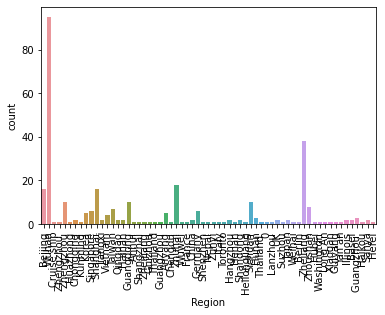

In [17]:
a = sns.countplot(df_covid19['Region'])
a.set_xticklabels(a.get_xticklabels(),rotation =90)

[Text(0.5, 1.0, 'Fever')]

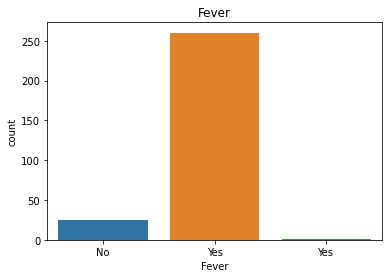

In [18]:
  b = sns.countplot(df_covid19['Fever'])
b.set_xticklabels(b.get_xticklabels(),rotation = 0)
b.set(title='Fever')


[Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No ')]

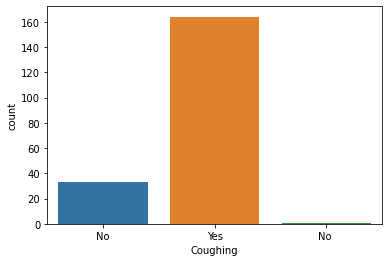

In [19]:

c = sns.countplot(df_covid19['Coughing'])
c.set_xticklabels(c.get_xticklabels(),rotation = 0)

[Text(0, 0, 'M'), Text(1, 0, 'F')]

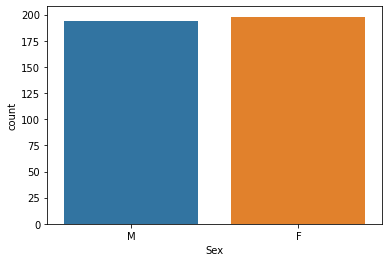

In [20]:

d = sns.countplot(df_covid19['Sex'])
d.set_xticklabels(d.get_xticklabels(),rotation = 0)

[Text(0.5, 1.0, 'Age')]

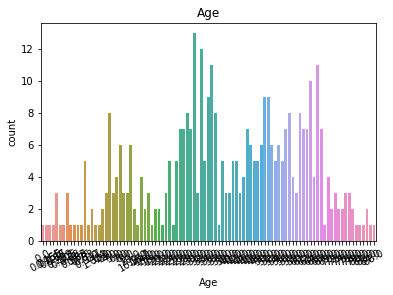

In [21]:

e = sns.countplot(df_covid19['Age'])
e.set_xticklabels(e.get_xticklabels(),rotation = 30)
e.set(title='Age')

[Text(0.5, 1.0, 'lymphocytesCategorical')]

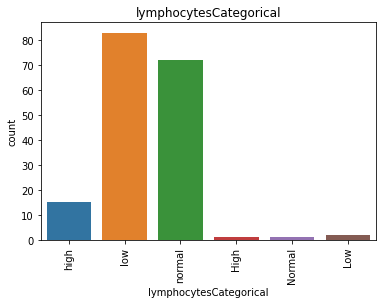

In [22]:


f = sns.countplot(df_covid19['lymphocytesCategorical'])
f.set_xticklabels(f.get_xticklabels(),rotation = 90)
f.set(title='lymphocytesCategorical')

In [23]:
df_covid19

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,...,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
1072,COVID19,NaN,0.83,M,Beijing,No/Wuhan,NaN,NaN,normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,COVID19,NaN,36.00,M,Beijing,No,NaN,NaN,high,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,COVID19,NaN,49.00,F,Wuhan,No/Wuhan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,COVID19,NaN,61.00,M,Wuhan,No/Wuhan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,COVID19,NaN,32.00,M,Wuhan,No/Wuhan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,COVID19,NaN,1.40,NaN,NaN,NaN,NaN,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,COVID19,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,14.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1482,COVID19,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1483,COVID19,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

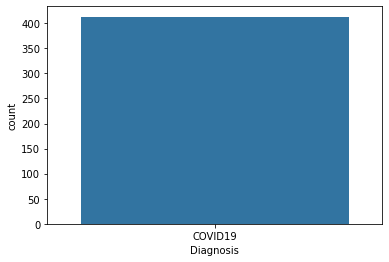

In [24]:
sns.countplot(df_covid19['Diagnosis'])

In [25]:
df_other = pd.read_csv('COVIDandFLUdata.csv')

In [26]:
df_other

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,...,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
0,H1N1,NaN,67.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,38.111111,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,H1N1,NaN,29.00,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,36.555556,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
4,H1N1,NaN,21.00,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,COVID19,NaN,1.40,NaN,NaN,NaN,NaN,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,COVID19,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,14.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1482,COVID19,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1483,COVID19,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_other = df.drop(range(1072, 1485))

In [28]:
df_other.describe()

,Age,NumberOfFamilyMembersInfected,neutrophil,serumLevelsOfWhiteBloodCell,Plateletes,Eosinophils,Red blood cells,Hemoglobin,Procalcitonin,DurationOfIllness,...,NumberAffectedLobes,TimeBetweenAdmissionAndDiagnosis,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Monocytes,Basophil,Thrombocytes
count,1068.000000,0.0,0.0,21.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,562.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,21.989429,NaN,NaN,5.980952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.120641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,19.483407,NaN,NaN,4.822304,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.095281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,35.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.000000,NaN,NaN,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,15.000000,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,35.000000,NaN,NaN,7.300000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,88.000000,NaN,NaN,21.600000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072 entries, 0 to 1071
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Diagnosis                               1072 non-null   object 
 1   InitialPCRDiagnosis                     0 non-null      object 
 2   Age                                     1068 non-null   float64
 3   Sex                                     1017 non-null   object 
 4   Region                                  0 non-null      object 
 5   CommunityTransmission                   0 non-null      object 
 6   NumberOfFamilyMembersInfected           0 non-null      float64
 7   neutrophil                              0 non-null      float64
 8   neutrophilCategorical                   21 non-null     object 
 9   serumLevelsOfWhiteBloodCell             21 non-null     float64
 10  serumLevelsOfWhiteBloodCellCategorical  21 non-null     obje

In [30]:
df_other

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,...,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,38.111111,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,36.555556,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,H1N1,NaN,60.0,M,NaN,NaN,NaN,NaN,high,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1068,H1N1,NaN,76.0,M,NaN,NaN,NaN,NaN,high,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,H1N1,NaN,31.0,M,NaN,NaN,NaN,NaN,high,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1070,H1N1,NaN,44.0,M,NaN,NaN,NaN,NaN,normal,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,...,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
0,H1N1,NaN,67.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,38.111111,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,H1N1,NaN,29.00,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,36.555556,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
4,H1N1,NaN,21.00,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,COVID19,NaN,1.40,NaN,NaN,NaN,NaN,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,COVID19,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,14.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1482,COVID19,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1483,COVID19,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

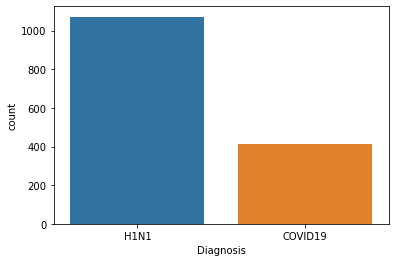

In [32]:
sns.countplot(df['Diagnosis'])

In [33]:
(df.isna().sum()/len(df)  )*100

Diagnosis                                   0.000000
InitialPCRDiagnosis                        92.996633
Age                                         1.885522
Sex                                         5.117845
Region                                     78.585859
CommunityTransmission                      83.232323
NumberOfFamilyMembersInfected              96.363636
neutrophil                                 93.063973
neutrophilCategorical                      90.033670
serumLevelsOfWhiteBloodCell                89.831650
serumLevelsOfWhiteBloodCellCategorical     87.138047
lymphocytes                                89.360269
lymphocytesCategorical                     86.868687
Plateletes                                 96.632997
CReactiveProteinLevels                     90.639731
CReactiveProteinLevelsCategorical          89.360269
Eosinophils                                99.461279
Red blood cells                            99.730640
Hemoglobin                                 98.

In [34]:
df = df.drop(columns=['InitialPCRDiagnosis','CommunityTransmission', 'NumberOfFamilyMembersInfected',
                          'neutrophil','neutrophilCategorical','serumLevelsOfWhiteBloodCell','Plateletes','CReactiveProteinLevels',
                          'CReactiveProteinLevelsCategorical','Eosinophils','Red blood cells','Hemoglobin','Procalcitonin',
                          'DurationOfIllness','DaysToDeath','DaysInIncubation','CTscanResults','XrayResults','SmokingStatus',
                          'VapingStatus','NumberAffectedLobes','GroundGlassOpacity','Asymptomatic','ShortnessOfBreath','TimeBetweenAdmissionAndDiagnosis',
                          'Pregnant','BabyDeath','PrematureDelivery','Hematocrit','ActivatedPartialThromboplastinTime','Fibrinogen'
                          ,'Urea','Monocytes','Basophil','Cancer','Thrombocytes'
                          
                         ], axis=1) 


In [35]:
df_other = df.drop(range(1072, 1485))
df_covid19 = df.drop(range(0,1072))


In [36]:
df_other['Diagnosis'].value_counts()

H1N1    1072
Name: Diagnosis, dtype: int64

In [37]:
df_covid19['Diagnosis'].value_counts()

COVID19    413
Name: Diagnosis, dtype: int64

In [38]:
df_covid19

,Diagnosis,Age,Sex,Region,serumLevelsOfWhiteBloodCellCategorical,lymphocytes,lymphocytesCategorical,RiskFactors,Diarrhea,Fever,Coughing,SoreThroat,NauseaVomitting,Temperature,Fatigue
1072,COVID19,0.83,M,Beijing,normal,NaN,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,COVID19,36.00,M,Beijing,high,NaN,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,COVID19,49.00,F,Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,COVID19,61.00,M,Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,COVID19,32.00,M,Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,COVID19,1.40,NaN,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,COVID19,0.83,NaN,NaN,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1482,COVID19,3.00,NaN,NaN,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1483,COVID19,4.00,NaN,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_other

,Diagnosis,Age,Sex,Region,serumLevelsOfWhiteBloodCellCategorical,lymphocytes,lymphocytesCategorical,RiskFactors,Diarrhea,Fever,Coughing,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,NaN,38.111111,No
1,H1N1,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,20.0,F,NaN,NaN,NaN,NaN,immuno,NaN,Yes,Yes,No,NaN,36.555556,Yes
4,H1N1,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,H1N1,60.0,M,NaN,low,0.25,low,pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1068,H1N1,76.0,M,NaN,normal,0.33,low,pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,H1N1,31.0,M,NaN,low,0.59,low,pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1070,H1N1,44.0,M,NaN,low,1.12,normal,pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
(df_other.isna().sum()/1072)*100

Diagnosis                                   0.000000
Age                                         0.373134
Sex                                         5.130597
Region                                    100.000000
serumLevelsOfWhiteBloodCellCategorical     98.041045
lymphocytes                                98.041045
lymphocytesCategorical                     98.041045
RiskFactors                                86.194030
Diarrhea                                   64.179104
Fever                                      40.298507
Coughing                                   38.059701
SoreThroat                                 43.190299
NauseaVomitting                            63.805970
Temperature                                47.574627
Fatigue                                    51.679104
dtype: float64

In [41]:
(df_covid19.isna().sum()/413)*100

Diagnosis                                  0.000000
Age                                        5.811138
Sex                                        5.084746
Region                                    23.002421
serumLevelsOfWhiteBloodCellCategorical    58.837772
lymphocytes                               66.828087
lymphocytesCategorical                    57.869249
RiskFactors                               81.113801
Diarrhea                                  84.019370
Fever                                     30.750605
Coughing                                  52.058111
SoreThroat                                85.230024
NauseaVomitting                           91.767554
Temperature                               83.777240
Fatigue                                   96.852300
dtype: float64

In [42]:
df_1 = pd.concat([df_other ,df_covid19],axis=0 )

df_1 = df_1.drop(columns=['serumLevelsOfWhiteBloodCellCategorical','lymphocytes','lymphocytesCategorical','NauseaVomitting','Fatigue'
                          ,'Region'
                          
                         ], axis=1) 


In [43]:
df_1

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,SoreThroat,Temperature
0,H1N1,67.00,F,NaN,NaN,Yes,Yes,No,38.111111
1,H1N1,29.00,M,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,22.00,F,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,20.00,F,immuno,NaN,Yes,Yes,No,36.555556
4,H1N1,21.00,M,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1480,COVID19,1.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,COVID19,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1482,COVID19,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1483,COVID19,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_other = df_1.drop(range(1072, 1485))
df_covid19 = df_1.drop(range(0,1072))

In [45]:
(df_other.isna().sum()/1072)*100

Diagnosis       0.000000
Age             0.373134
Sex             5.130597
RiskFactors    86.194030
Diarrhea       64.179104
Fever          40.298507
Coughing       38.059701
SoreThroat     43.190299
Temperature    47.574627
dtype: float64

In [46]:
(df_covid19.isna().sum()/len(df_covid19))*100

Diagnosis       0.000000
Age             5.811138
Sex             5.084746
RiskFactors    81.113801
Diarrhea       84.019370
Fever          30.750605
Coughing       52.058111
SoreThroat     85.230024
Temperature    83.777240
dtype: float64

In [47]:
df_covid19.describe()

,Age,Temperature
count,389.000000,67.000000
mean,38.913063,37.620896
std,21.885982,0.980343
min,0.000000,36.200000
25%,26.000000,36.700000
50%,39.000000,37.500000
75%,57.000000,38.500000
max,88.000000,39.500000


In [48]:
df_covid19['Sex'].value_counts()


F    198
M    194
Name: Sex, dtype: int64

In [49]:
df_covid19['RiskFactors'].value_counts()


None                                                                  14
diabetes                                                               9
Hypertension                                                           7
influenza                                                              7
Heart Disease                                                          3
PROM                                                                   2
Hypertension, diabetes                                                 2
Fetal distress                                                         2
lung cancer                                                            2
Heart Disease,Renal Disease                                            2
hypertention                                                           1
Lung Disease                                                           1
HepB                                                                   1
Hypertension, Heart Disease, chronic obstructive pu

In [50]:
df_covid19['RiskFactors'].value_counts()


None                                                                  14
diabetes                                                               9
Hypertension                                                           7
influenza                                                              7
Heart Disease                                                          3
PROM                                                                   2
Hypertension, diabetes                                                 2
Fetal distress                                                         2
lung cancer                                                            2
Heart Disease,Renal Disease                                            2
hypertention                                                           1
Lung Disease                                                           1
HepB                                                                   1
Hypertension, Heart Disease, chronic obstructive pu

In [51]:
df_covid19['Diarrhea'].value_counts()


No     36
Yes    30
Name: Diarrhea, dtype: int64

In [52]:
df_covid19['Fever'].value_counts()


Yes     260
No       25
Yes       1
Name: Fever, dtype: int64

In [53]:
df_covid19['Coughing'].value_counts()

Yes    164
No      33
No       1
Name: Coughing, dtype: int64

In [54]:

df_covid19['SoreThroat'].value_counts()
           
           

Yes    37
No     24
Name: SoreThroat, dtype: int64

In [55]:
df_covid19 = df_covid19.fillna({'Sex': 'M' , 'Age':'38.913063', 'RiskFactors':'diabetes','Diarrhea': 'No', 'Fever': 'Yes','Coughing':'yes'
                   , 'SoreThroat': 'Yes' ,'Temperature': '37.620896'})





In [56]:
df_other

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,SoreThroat,Temperature
0,H1N1,67.0,F,NaN,NaN,Yes,Yes,No,38.111111
1,H1N1,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,20.0,F,immuno,NaN,Yes,Yes,No,36.555556
4,H1N1,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1067,H1N1,60.0,M,pneumonia,NaN,NaN,NaN,NaN,NaN
1068,H1N1,76.0,M,pneumonia,NaN,NaN,NaN,NaN,NaN
1069,H1N1,31.0,M,pneumonia,NaN,NaN,NaN,NaN,NaN
1070,H1N1,44.0,M,pneumonia,NaN,NaN,NaN,NaN,NaN


In [57]:
(df_covid19.isna().sum()/413)*100

Diagnosis      0.0
Age            0.0
Sex            0.0
RiskFactors    0.0
Diarrhea       0.0
Fever          0.0
Coughing       0.0
SoreThroat     0.0
Temperature    0.0
dtype: float64

In [58]:
(df_other.isna().sum()/1072)*100

Diagnosis       0.000000
Age             0.373134
Sex             5.130597
RiskFactors    86.194030
Diarrhea       64.179104
Fever          40.298507
Coughing       38.059701
SoreThroat     43.190299
Temperature    47.574627
dtype: float64

In [59]:
df_other.describe()

,Age,Temperature
count,1068.000000,562.000000
mean,21.989429,38.120641
std,19.483407,1.095281
min,0.000000,35.722222
25%,6.000000,37.300000
50%,15.000000,38.000000
75%,35.000000,38.722222
max,88.000000,42.222222


In [60]:
df_other['Sex'].value_counts()

M    556
F    461
Name: Sex, dtype: int64

In [61]:
df_other['RiskFactors'].value_counts()

asthma                                                36
immuno                                                21
pneumonia                                             21
chronic                                               11
diabetes                                               7
congestive, diabetes, Renal Disease                    7
asthma, diabetes                                       5
chronic, diabetes                                      5
Renal Disease                                          4
asthma, respiratory disease                            3
chronic, diabetes, athero                              2
respiratory disease                                    2
athero                                                 2
asthma, Renal Disease                                  2
asthma, immuno                                         2
diabetes, Renal Disease                                2
asthma, respiratory disease, hematological disease     2
Heart Disease                  

In [62]:
df_other['Diarrhea'].value_counts()

No     304
Yes     80
Name: Diarrhea, dtype: int64

In [63]:
df_other['Fever'].value_counts()

Yes    518
No     122
Name: Fever, dtype: int64

In [64]:
df_other['Coughing'].value_counts()

Yes    583
No      81
Name: Coughing, dtype: int64

In [65]:
df_other['SoreThroat'].value_counts()

Yes    370
No     239
Name: SoreThroat, dtype: int64

In [66]:
df_other

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,SoreThroat,Temperature
0,H1N1,67.0,F,NaN,NaN,Yes,Yes,No,38.111111
1,H1N1,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,20.0,F,immuno,NaN,Yes,Yes,No,36.555556
4,H1N1,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1067,H1N1,60.0,M,pneumonia,NaN,NaN,NaN,NaN,NaN
1068,H1N1,76.0,M,pneumonia,NaN,NaN,NaN,NaN,NaN
1069,H1N1,31.0,M,pneumonia,NaN,NaN,NaN,NaN,NaN
1070,H1N1,44.0,M,pneumonia,NaN,NaN,NaN,NaN,NaN


In [67]:
df_other = df_other.fillna({'Sex': 'M' , 'Age':'21.989429', 'RiskFactors':'asthma','Diarrhea': 'No', 'Fever': 'Yes','Coughing':'yes'
                   , 'SoreThroat': 'Yes' ,'Temperature': '38.120641'})



df_other.head()

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,SoreThroat,Temperature
0,H1N1,67.0,F,asthma,No,Yes,Yes,No,38.111111
1,H1N1,29.0,M,asthma,No,Yes,yes,Yes,38.120641
2,H1N1,22.0,F,asthma,No,Yes,yes,Yes,38.120641
3,H1N1,20.0,F,immuno,No,Yes,Yes,No,36.555556
4,H1N1,21.0,M,asthma,No,Yes,yes,Yes,38.120641


In [68]:
df_underS1 = pd.concat([df_other ,df_covid19],axis=0 )

Text(0.5, 1.0, 'Count in the Diagnosis')

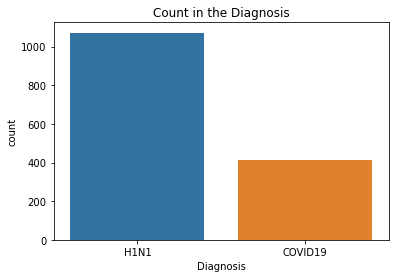

In [69]:
sns.countplot(df_underS1['Diagnosis'])
plt.title("Count in the Diagnosis")

In [70]:
df_other_sample_1 = df_other.sample(413)

In [71]:
df_underS1 = pd.concat([df_other_sample_1 ,df_covid19],axis=0 )

Text(0.5, 1.0, 'Count in the Diagnosis')

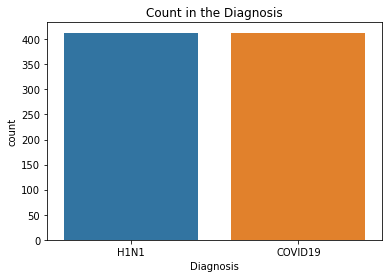

In [72]:
sns.countplot(df_underS1['Diagnosis'])
plt.title("Count in the Diagnosis")

In [73]:
df_underS1

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,SoreThroat,Temperature
466,H1N1,1.0,M,asthma,No,Yes,yes,Yes,38.120641
306,H1N1,3.0,F,asthma,No,Yes,yes,Yes,38.120641
383,H1N1,6.0,M,asthma,No,Yes,yes,Yes,38.120641
876,H1N1,48.0,M,asthma,No,Yes,Yes,No,37.0
225,H1N1,76.0,M,"congestive, diabetes, Renal Disease",No,Yes,Yes,Yes,41.222222
...,...,...,...,...,...,...,...,...,...
1480,COVID19,1.4,M,diabetes,No,Yes,yes,Yes,37.620896
1481,COVID19,0.83,M,diabetes,No,Yes,yes,Yes,37.620896
1482,COVID19,3.0,M,diabetes,No,Yes,yes,Yes,37.620896
1483,COVID19,4.0,M,diabetes,No,Yes,yes,Yes,37.620896


In [74]:
df_underS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 466 to 1484
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Diagnosis    826 non-null    object
 1   Age          826 non-null    object
 2   Sex          826 non-null    object
 3   RiskFactors  826 non-null    object
 4   Diarrhea     826 non-null    object
 5   Fever        826 non-null    object
 6   Coughing     826 non-null    object
 7   SoreThroat   826 non-null    object
 8   Temperature  826 non-null    object
dtypes: object(9)
memory usage: 96.8+ KB


In [75]:
df_underS1

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,SoreThroat,Temperature
466,H1N1,1.0,M,asthma,No,Yes,yes,Yes,38.120641
306,H1N1,3.0,F,asthma,No,Yes,yes,Yes,38.120641
383,H1N1,6.0,M,asthma,No,Yes,yes,Yes,38.120641
876,H1N1,48.0,M,asthma,No,Yes,Yes,No,37.0
225,H1N1,76.0,M,"congestive, diabetes, Renal Disease",No,Yes,Yes,Yes,41.222222
...,...,...,...,...,...,...,...,...,...
1480,COVID19,1.4,M,diabetes,No,Yes,yes,Yes,37.620896
1481,COVID19,0.83,M,diabetes,No,Yes,yes,Yes,37.620896
1482,COVID19,3.0,M,diabetes,No,Yes,yes,Yes,37.620896
1483,COVID19,4.0,M,diabetes,No,Yes,yes,Yes,37.620896


In [76]:
df_underS1.head()

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,SoreThroat,Temperature
466,H1N1,1.0,M,asthma,No,Yes,yes,Yes,38.120641
306,H1N1,3.0,F,asthma,No,Yes,yes,Yes,38.120641
383,H1N1,6.0,M,asthma,No,Yes,yes,Yes,38.120641
876,H1N1,48.0,M,asthma,No,Yes,Yes,No,37.0
225,H1N1,76.0,M,"congestive, diabetes, Renal Disease",No,Yes,Yes,Yes,41.222222


In [77]:
df_underS1.head()

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,SoreThroat,Temperature
466,H1N1,1.0,M,asthma,No,Yes,yes,Yes,38.120641
306,H1N1,3.0,F,asthma,No,Yes,yes,Yes,38.120641
383,H1N1,6.0,M,asthma,No,Yes,yes,Yes,38.120641
876,H1N1,48.0,M,asthma,No,Yes,Yes,No,37.0
225,H1N1,76.0,M,"congestive, diabetes, Renal Disease",No,Yes,Yes,Yes,41.222222


In [78]:
df_underS1 = pd.get_dummies(df_underS1, columns=['Diagnosis'], drop_first=True, prefix='dia')
df_underS1 = pd.get_dummies(df_underS1, columns=['Sex'], drop_first=True, prefix='gender')
df_underS1 = pd.get_dummies(df_underS1, columns=['Diarrhea'], drop_first=True, prefix='diarrhea')
df_underS1 = pd.get_dummies(df_underS1, columns=['Fever'], drop_first=True, prefix='Fever')
df_underS1 = pd.get_dummies(df_underS1, columns=['Coughing'], drop_first=True, prefix='Coughing')
df_underS1 = pd.get_dummies(df_underS1, columns=['SoreThroat'], drop_first=True, prefix='SoreThroat')

In [79]:
df_underS1

,Age,RiskFactors,Temperature,dia_H1N1,gender_M,diarrhea_Yes,Fever_Yes,Fever_Yes,Coughing_No,Coughing_Yes,Coughing_yes,SoreThroat_Yes
466,1.0,asthma,38.120641,1,1,0,1,0,0,0,1,1
306,3.0,asthma,38.120641,1,0,0,1,0,0,0,1,1
383,6.0,asthma,38.120641,1,1,0,1,0,0,0,1,1
876,48.0,asthma,37.0,1,1,0,1,0,0,1,0,0
225,76.0,"congestive, diabetes, Renal Disease",41.222222,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1480,1.4,diabetes,37.620896,0,1,0,1,0,0,0,1,1
1481,0.83,diabetes,37.620896,0,1,0,1,0,0,0,1,1
1482,3.0,diabetes,37.620896,0,1,0,1,0,0,0,1,1
1483,4.0,diabetes,37.620896,0,1,0,1,0,0,0,1,1


In [80]:
df_underS1 = df_underS1.drop(columns=['RiskFactors','Fever_Yes','Coughing_Yes'], axis=1) 

In [81]:
df_underS1

,Age,Temperature,dia_H1N1,gender_M,diarrhea_Yes,Fever_Yes,Coughing_No,Coughing_yes,SoreThroat_Yes
466,1.0,38.120641,1,1,0,0,0,1,1
306,3.0,38.120641,1,0,0,0,0,1,1
383,6.0,38.120641,1,1,0,0,0,1,1
876,48.0,37.0,1,1,0,0,0,0,0
225,76.0,41.222222,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,1.4,37.620896,0,1,0,0,0,1,1
1481,0.83,37.620896,0,1,0,0,0,1,1
1482,3.0,37.620896,0,1,0,0,0,1,1
1483,4.0,37.620896,0,1,0,0,0,1,1


In [82]:
df_underS1 = df_underS1.drop(columns=['Coughing_yes'], axis=1) 

<AxesSubplot:>

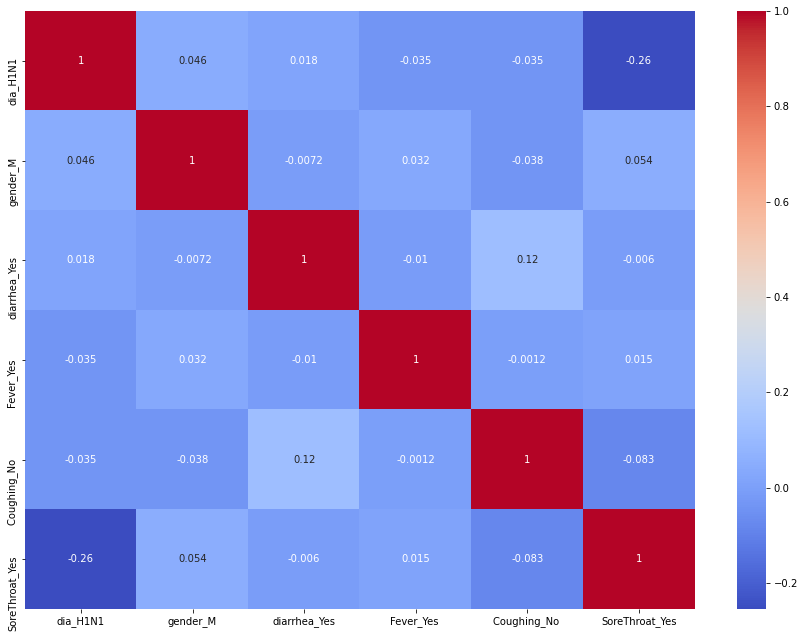

In [83]:
corr = df_underS1.corr()
plt.figure(figsize=(15,11))
sns.heatmap(corr,annot=True , cmap='coolwarm')

In [84]:
x = df_underS1.drop(columns=['dia_H1N1'], axis=1) 
y = df_underS1['dia_H1N1']

In [85]:
df_underS1

,Age,Temperature,dia_H1N1,gender_M,diarrhea_Yes,Fever_Yes,Coughing_No,SoreThroat_Yes
466,1.0,38.120641,1,1,0,0,0,1
306,3.0,38.120641,1,0,0,0,0,1
383,6.0,38.120641,1,1,0,0,0,1
876,48.0,37.0,1,1,0,0,0,0
225,76.0,41.222222,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...
1480,1.4,37.620896,0,1,0,0,0,1
1481,0.83,37.620896,0,1,0,0,0,1
1482,3.0,37.620896,0,1,0,0,0,1
1483,4.0,37.620896,0,1,0,0,0,1


In [86]:
# Specify the hyperparameter 
parameters = {'SVM__C': [1, 10, 100],#3
              'SVM__gamma': [0.1, 0.01],#2
              'SVM__kernel': ['rbf']}#1

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=21 , stratify =y)

In [87]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

In [88]:
# instantiate the pipeline
pipeline = Pipeline(steps)

In [89]:
# instantiate the GridSeachCV
cv = GridSearchCV(pipeline, param_grid=parameters)

In [90]:
# Fit to the training set
cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [1, 10, 100], 'SVM__gamma': [0.1, 0.01],
                         'SVM__kernel': ['rbf']})

In [91]:
y_pred = cv.predict(X_test)

In [92]:
confusion_matrix(y_test, y_pred)

array([[73, 10],
       [ 6, 77]], dtype=int64)

In [93]:
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9036144578313253
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        83
           1       0.89      0.93      0.91        83

    accuracy                           0.90       166
   macro avg       0.90      0.90      0.90       166
weighted avg       0.90      0.90      0.90       166

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}


In [94]:
from sklearn.ensemble import RandomForestClassifier


parameters = {'RandomForest__criterion':['gini', 'entropy'],
              'RandomForest__max_features':['auto', 'sqrt', 'log2'],
              'RandomForest__class_weight':['balanced', 'balanced_subsample'],
              'RandomForest__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             
             
             }

# 
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('RandomForest', RandomForestClassifier())]


# instantiate the pipeline
pipeline = Pipeline(steps)

# instantiate the GridSeachCV
cv = GridSearchCV(pipeline, param_grid=parameters)
# Fit to the training set
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.9156626506024096
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        83
           1       0.88      0.96      0.92        83

    accuracy                           0.92       166
   macro avg       0.92      0.92      0.92       166
weighted avg       0.92      0.92      0.92       166

Tuned Model Parameters: {'RandomForest__class_weight': 'balanced', 'RandomForest__criterion': 'entropy', 'RandomForest__max_depth': 20, 'RandomForest__max_features': 'log2'}


In [95]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train,y_train)


y_pred = knn_model.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Accuracy: {}".format(knn_model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))


Accuracy: 0.7228915662650602
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        83
           1       0.72      0.73      0.73        83

    accuracy                           0.72       166
   macro avg       0.72      0.72      0.72       166
weighted avg       0.72      0.72      0.72       166



In [97]:
from sklearn.naive_bayes import GaussianNB





NB_model = GaussianNB()

NB_model.fit(X_train,y_train)


y_pred = knn_model.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Accuracy: {}".format(NB_model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))


Accuracy: 0.7228915662650602
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        83
           1       0.72      0.73      0.73        83

    accuracy                           0.72       166
   macro avg       0.72      0.72      0.72       166
weighted avg       0.72      0.72      0.72       166



In [99]:
import xgboost as xgb
xg = xgb.XGBClassifier(objective='binary:logistic' , n_estimators=10 , seed=123)
xgb_model = xgb.XGBClassifier(eta=0.1, nrounds=1000, max_depth=8, colsample_bytree=0.5, scale_pos_weight=1.1, booster='gbtree', 
                                  metric='multi:softmax')
hr_pred = xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C')).predict(X_test._get_numeric_data())
print(classification_report(y_test, hr_pred))

[22:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "metric", "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.57      0.93      0.71        83
           1       0.81      0.31      0.45        83

    accuracy                           0.62       166
   macro avg       0.69      0.62      0.58   

In [101]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   

clf_model.fit(X_train,y_train)





y_pred = clf_model.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Accuracy: {}".format(clf_model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 0.7228915662650602
              precision    recall  f1-score   support

           0       0.96      0.86      0.90        83
           1       0.87      0.96      0.91        83

    accuracy                           0.91       166
   macro avg       0.91      0.91      0.91       166
weighted avg       0.91      0.91      0.91       166

